VADER 0


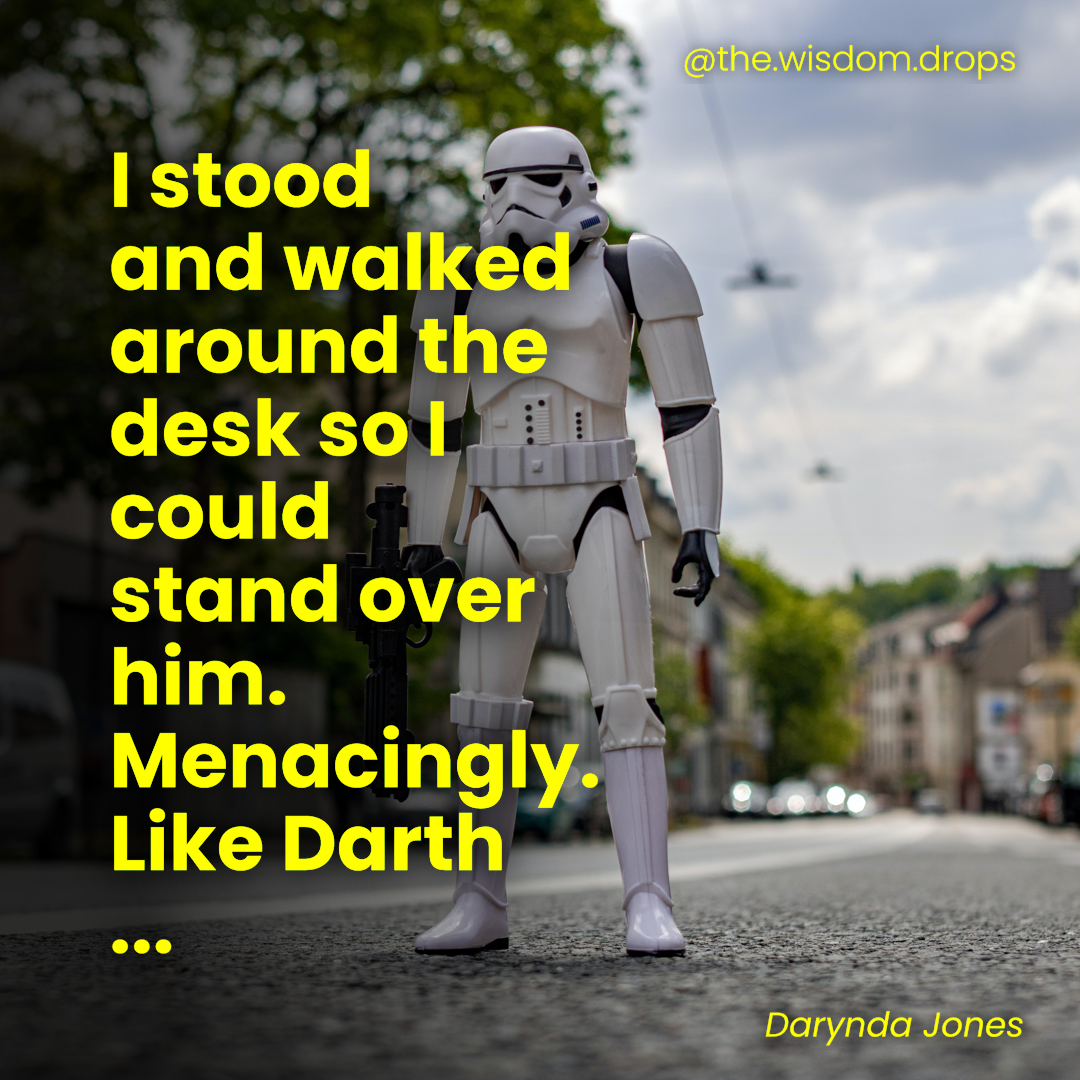

In [2]:
import requests
from PIL import Image
from quote import quote
from src.image.crop import crop
from src.image.draw import resize_img
from src.image.extract import ApiImgExtractor
from src.image.merge import merge_text_to_image
from src.paths import LOCAL_PROCESSED_DATA_PATH

themes = [ 'dreams'
         ]
format_ = "PNG"
n = 1 # amount of quotes per theme
for t in themes:
    api = ApiImgExtractor('unsplash')
    quotes = quote(t, limit=n)
    api.query(_search_params={
        'q': t,
        'imgType': 'photos'
    })
    if not quotes:
        continue
    for i, (q, img_url) in enumerate(zip(quotes, api.img_urls)):
        print(t, i)
        if not q or not img_url:
            break
        filepath = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.{format_}"
        img = crop(img_url, export=False, output_size=(1080,1080))
        txt = q['quote']
        
        tb_txt = 'Unknown Author'
        if (q['author'] != '') and (len(q['author'].split(' ')) > 1):
            tb_txt = q['author']
        elif q['book'] != '':
            tb_txt = "Book: " + q['book']
            
        txt = txt.replace('.', '. ').replace('  ', ' ')
        
        post = merge_text_to_image(img, txt, bottom_right_txt=tb_txt,
                                   top_right_txt="@the.wisdom.drops",
                                   txt_aspect_ratio=.30, txt_brightness=3)
        post.save(filepath, format_, quality=90)
post